In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import sklearn.ensemble as ske

In [11]:
file_path = 'C:/Users/Nacho/Documents/TELECO_6/TFG/Datasets'
csv_3 = '/features_3_sec.csv'
csv_30 = '/features_30_sec.csv'
music_data = pd.read_csv(csv_path + csv_3)
print("Dataset has", music_data.shape)
music_data.head()

Dataset has (9990, 60)


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


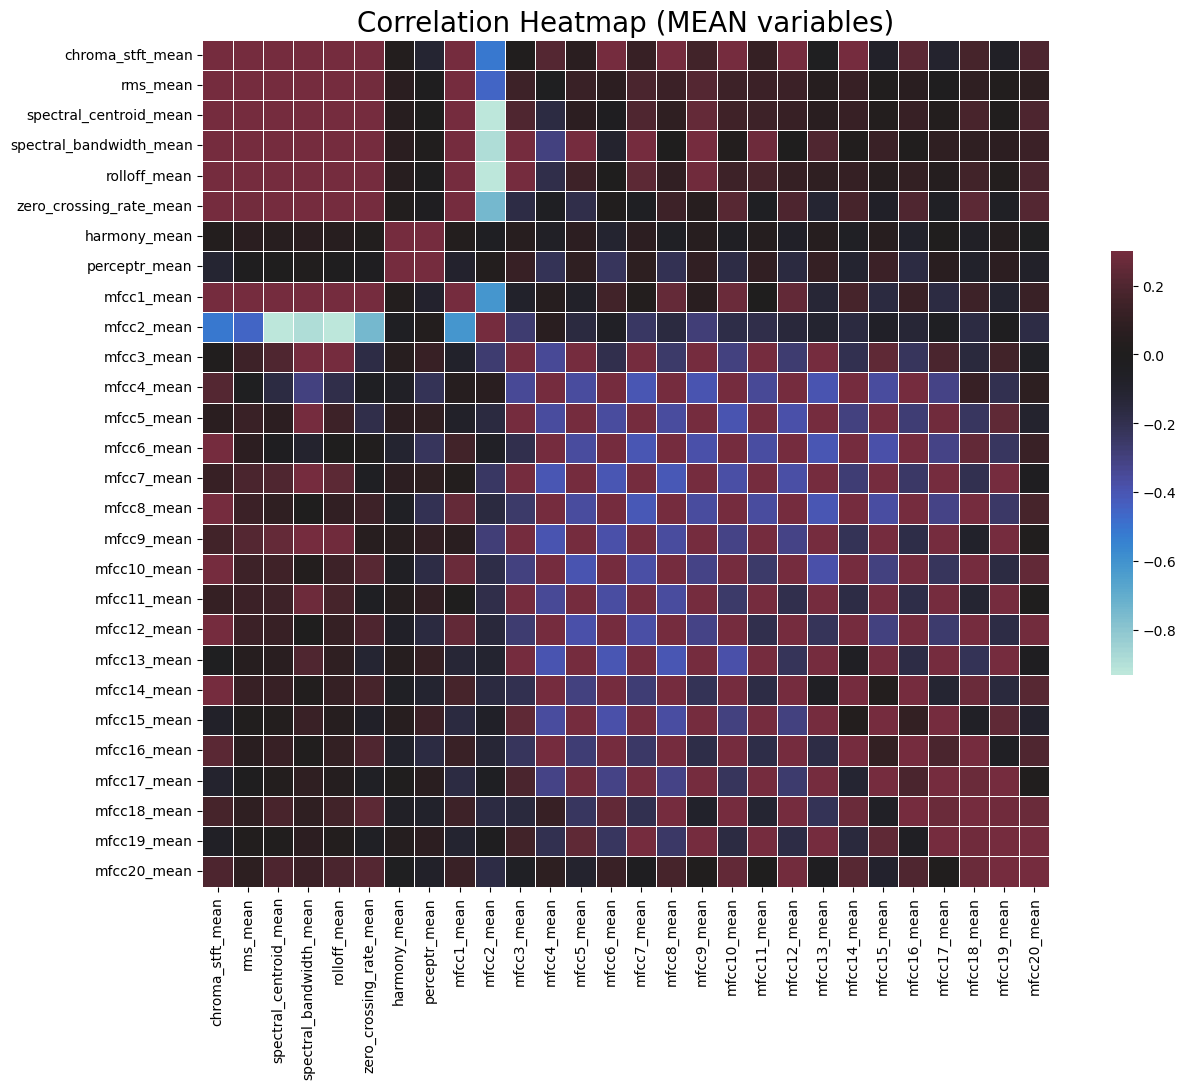

In [12]:
# Computing the  Correlation Matrix using only the features that have 'mean' in their name.
mean_cols = [col for col in music_data.columns if 'mean' in col]
corr = music_data[mean_cols].corr()

#the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));
sns.heatmap(corr, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr_Heatmap.png")

In the heat map, warm colors represent high values and cool values represent low values.
Values in a correlation matrix range from -1 to 1. A value of one indicates a perfect positive correlation meaning as one value increases, the other also increases. A value of -1 indicates a perfect negative correlation meaning as one value increases, the other decreases. A value of 0 indicates no correlation between the variables.

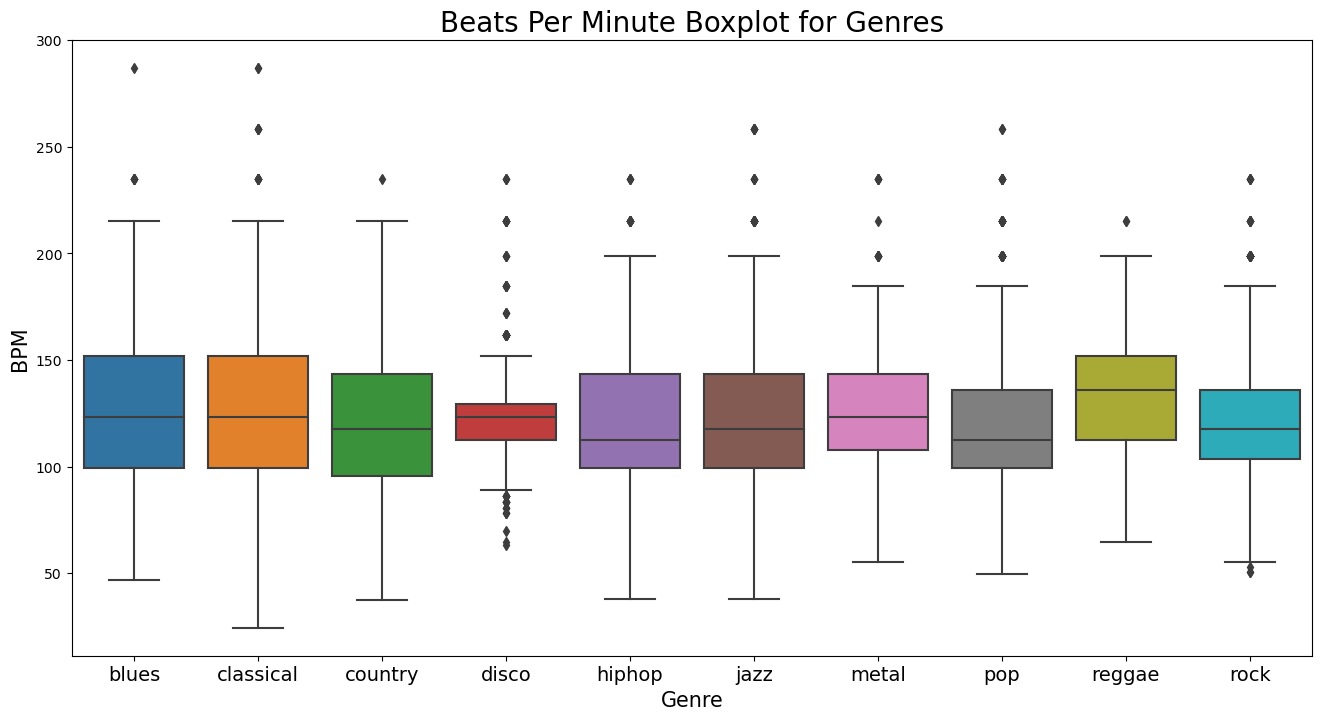

In [13]:
# A box plot to show the distribution of music pieces in different genres in different tempo/beats per minute values.
x = music_data[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x);

plt.title('Beats Per Minute Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

In [14]:
#Checking for null values in the data. 
print("Columns with null values are",list(music_data.columns[music_data.isnull().any()]))
#Since there are no null values in any of the columns, there is no need to create dummy values.

Columns with null values are []


In [15]:
# map labels to index
label_index = dict()
index_label = dict()
for i, x in enumerate(music_data.label.unique()):
    label_index[x] = i
    index_label[i] = x
print(label_index)
print(index_label)

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
{0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}


In [16]:
# update labels in df to index
music_data.label = [label_index[l] for l in music_data.label]

In [17]:
#Splitting the data into training testing and validation sets
data_shuffle = music_data.sample(frac=1, random_state=12).reset_index(drop=True) #shuffling the data
# remove columns that have no impact on the prediction
data_shuffle.drop(['filename', 'length'], axis=1, inplace=True)
data_y = data_shuffle.pop('label')
data_X = data_shuffle


# split original dataset into train and test
X_train, data_test_valid_X, y_train, data_test_valid_y = skms.train_test_split(data_X, data_y, train_size=0.7, random_state=12, stratify=data_y)
#split test dataset into validation and test
X_validation, X_test, y_validation, y_test = skms.train_test_split(data_test_valid_X, data_test_valid_y, train_size=0.66, random_state=12, stratify=data_test_valid_y)
#stratify - all the sets will have an equal proportion of genres

#Validating the data splits
print(f"Train set has {X_train.shape[0]} records out of {len(data_shuffle)} which is {round(X_train.shape[0]/len(data_shuffle)*100)}% of the data.")
print(f"Validation set has {X_validation.shape[0]} records out of {len(data_shuffle)} which is {round(X_validation.shape[0]/len(data_shuffle)*100)}% of the data.")
print(f"Test set has {X_test.shape[0]} records out of {len(data_shuffle)} which is {round(X_test.shape[0]/len(data_shuffle)*100)}% of the data.")

Train set has 6993 records out of 9990 which is 70% of the data.
Validation set has 1978 records out of 9990 which is 20% of the data.
Test set has 1019 records out of 9990 which is 10% of the data.


In [18]:
#scaling the features. This will ensure that features with larger values do not affect the prediction
#disproportionately compared to the smaller values
scaler = skp.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_validation = pd.DataFrame(scaler.transform(X_validation), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [19]:
X_train[:5] # To show the changes in the values of the features.

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,-1.062377,1.059887,-0.017604,0.292234,0.161324,2.043523,0.526150,0.224090,0.175876,1.097624,...,-0.558123,-0.705555,0.119994,-0.205566,-0.226063,0.149913,0.899041,-0.166056,-0.231108,-0.363293
1,-0.083512,-0.423523,0.500707,-0.252171,1.178428,1.269410,1.662489,-0.343111,1.469377,0.009798,...,-0.248006,-0.410600,1.880115,-0.256802,1.030546,-0.200007,1.283003,-0.032856,0.331679,-0.625975
2,0.367229,0.387412,-0.220990,-0.419789,0.680967,-0.761433,0.398777,-0.781397,0.709142,-0.833996,...,1.282682,-0.021459,-0.643239,-0.317940,1.606829,0.125131,0.533941,0.036979,0.537815,-0.298918
3,0.711132,1.028132,1.234200,3.373341,0.949778,1.549702,1.337364,1.239891,1.076453,1.539554,...,-0.387694,-0.243058,0.640777,-0.153323,-0.823606,0.627101,0.391001,0.730217,-0.248430,0.472748
4,-1.090132,0.803497,-0.482197,-0.298583,-0.132997,0.665700,0.197874,0.365725,-0.087460,0.924359,...,0.510603,-0.156016,1.302447,1.482248,0.070578,-0.377452,0.807831,-0.030836,0.012724,-0.139604


In the next cell, the results function has a model, data and a boolean as its parameters. It returns a confusion matrix and a classification report (accuracy, F1-score, precision and recall values) for the different genres. When validation is set to false, confusion matrix and the classification report for the training dataset and when validation is set to true, it uses the validation dataset to test the accuracy of the model.

In [20]:
def results(model, X, validation=False):
    y_true = y_train
    if validation:
        X = X_validation[X.columns]
        y_true = y_validation
    y_prediction = model.predict(X)
    confusion_matrix = skm.confusion_matrix(y_true, y_prediction)
    cm_display = skm.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
    cm_display.plot()
    plt.show()
    print(skm.classification_report(y_true, y_prediction, digits=3))
    print(skm.precision_recall_fscore_support(y_true, y_prediction, average="macro"))
    print("=====================================================")

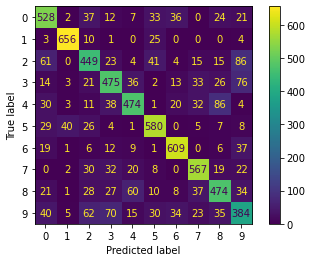

              precision    recall  f1-score   support

           0      0.709     0.754     0.731       700
           1      0.920     0.938     0.929       699
           2      0.660     0.643     0.652       698
           3      0.684     0.680     0.682       699
           4      0.757     0.678     0.715       699
           5      0.793     0.829     0.811       700
           6      0.841     0.870     0.855       700
           7      0.796     0.810     0.803       700
           8      0.685     0.677     0.681       700
           9      0.568     0.550     0.559       698

    accuracy                          0.743      6993
   macro avg      0.741     0.743     0.742      6993
weighted avg      0.742     0.743     0.742      6993

(0.7414662213267967, 0.7429547081176138, 0.7418158053480053, None)


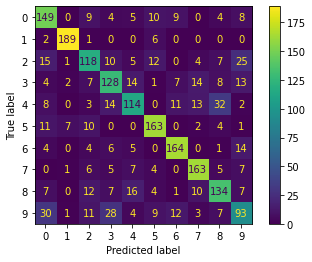

              precision    recall  f1-score   support

           0      0.648     0.753     0.696       198
           1      0.940     0.955     0.947       198
           2      0.652     0.599     0.624       197
           3      0.634     0.646     0.640       198
           4      0.671     0.579     0.621       197
           5      0.780     0.823     0.801       198
           6      0.804     0.828     0.816       198
           7      0.780     0.823     0.801       198
           8      0.663     0.677     0.670       198
           9      0.547     0.470     0.505       198

    accuracy                          0.715      1978
   macro avg      0.712     0.715     0.712      1978
weighted avg      0.712     0.715     0.712      1978

(0.7118465238938135, 0.7152412449366763, 0.7122542916213044, None)


In [12]:
#Feature importance using logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=400)
lr.fit(X_train, y_train)
results(lr, X_train)
results(lr, X_train, validation=True)

In [21]:
import eli5
from eli5.sklearn import PermutationImportance

ModuleNotFoundError: No module named 'eli5'

In [14]:
perm = PermutationImportance(lr, random_state=12).fit(X_validation, y_validation, n_iter=10)
print("Feature Importances using Permutation Importance from the eli5 library")
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Feature Importances using Permutation Importance from the eli5 library


Weight,Feature
0.1841 ± 0.0088,mfcc1_mean
0.1717 ± 0.0218,spectral_centroid_mean
0.1472 ± 0.0076,rms_mean
0.1364 ± 0.0103,rolloff_mean
0.1351 ± 0.0090,spectral_bandwidth_mean
0.1317 ± 0.0039,zero_crossing_rate_mean
0.0943 ± 0.0170,perceptr_var
0.0840 ± 0.0044,mfcc2_mean
0.0796 ± 0.0144,chroma_stft_mean
0.0791 ± 0.0065,mfcc3_mean


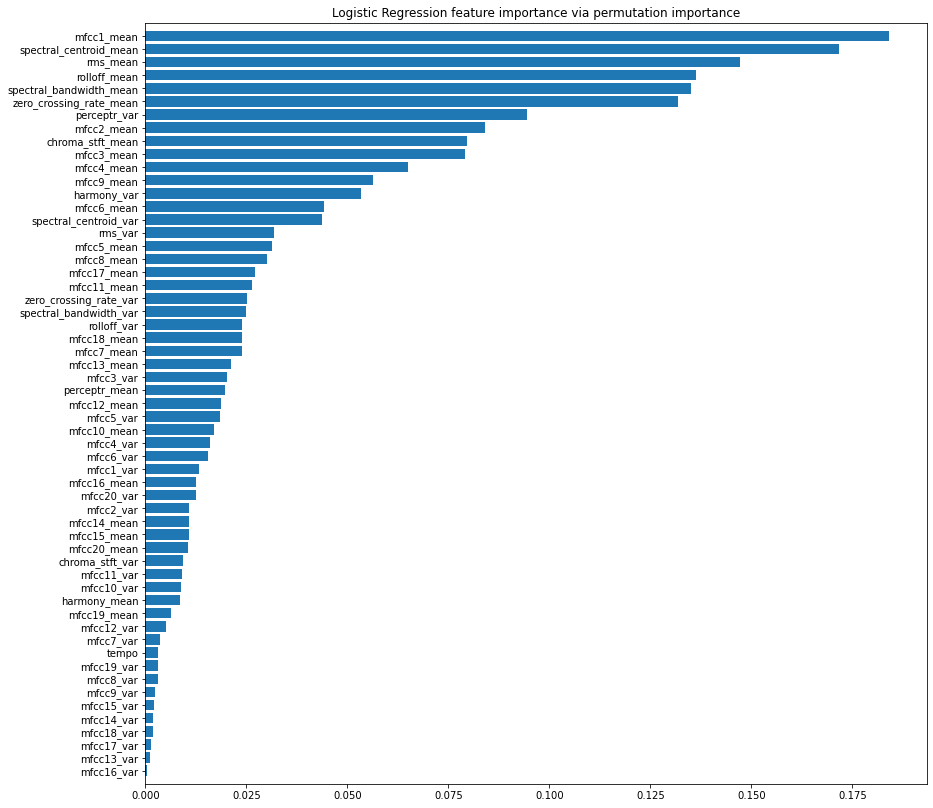

In [15]:
# plot the permutation importances
perm_indices = np.argsort(perm.feature_importances_)[::-1]
perm_features = [X_validation.columns.tolist()[xx] for xx in perm_indices]
plt.figure(figsize=(14, 14))
plt.title("Logistic Regression feature importance via permutation importance")
plt.barh(range(X_validation.shape[1]), perm.feature_importances_[perm_indices])
plt.yticks(range(X_validation.shape[1]), perm_features)
plt.ylim([X_validation.shape[1], -1])
plt.savefig("perm_importance.png")
plt.show()

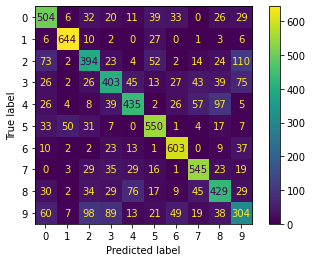

              precision    recall  f1-score   support

           0      0.656     0.720     0.687       700
           1      0.892     0.921     0.906       699
           2      0.593     0.564     0.579       698
           3      0.601     0.577     0.589       699
           4      0.695     0.622     0.657       699
           5      0.745     0.786     0.765       700
           6      0.803     0.861     0.831       700
           7      0.749     0.779     0.763       700
           8      0.609     0.613     0.611       700
           9      0.490     0.436     0.461       698

    accuracy                          0.688      6993
   macro avg      0.683     0.688     0.685      6993
weighted avg      0.683     0.688     0.685      6993

(0.6832827872406851, 0.6878743102391172, 0.6848007068231818, None)


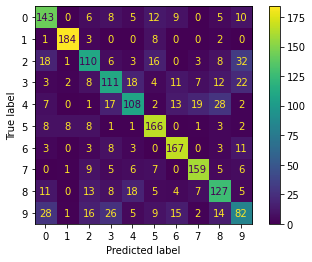

              precision    recall  f1-score   support

           0      0.644     0.722     0.681       198
           1      0.934     0.929     0.932       198
           2      0.621     0.558     0.588       197
           3      0.584     0.561     0.572       198
           4      0.647     0.548     0.593       197
           5      0.725     0.838     0.778       198
           6      0.763     0.843     0.801       198
           7      0.803     0.803     0.803       198
           8      0.614     0.641     0.627       198
           9      0.477     0.414     0.443       198

    accuracy                          0.686      1978
   macro avg      0.681     0.686     0.682      1978
weighted avg      0.681     0.686     0.682      1978

(0.6811289302569234, 0.6859124237296826, 0.6818315623667909, None)


In [16]:
# build model using perm selected top 30 features
lr_mif = LogisticRegression(max_iter=600)
X_train_mif = X_train[perm_features[:30]]
lr_mif.fit(X_train_mif,y_train)
results(lr_mif, X_train_mif)
results(lr_mif, X_train_mif, validation=True)

In [17]:
# Tuning hyperparameters of the logistic regression model using grid_search. 
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty =['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

param_grid = {'solver': solvers, 'penalty':penalty, 'C': c_values}
cv = skms.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
lr_grid_search = skms.GridSearchCV(lr_mif, param_grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
lr_grid_search.fit(X_train_mif, y_train)
print(lr_grid_search.best_params_)
print(lr_grid_search.best_estimator_)

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(C=100, max_iter=600, solver='newton-cg')


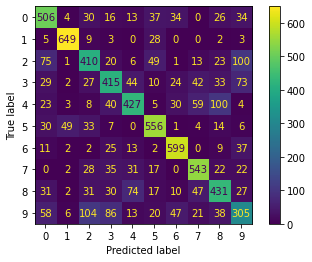

              precision    recall  f1-score   support

           0      0.659     0.723     0.689       700
           1      0.901     0.928     0.915       699
           2      0.601     0.587     0.594       698
           3      0.613     0.594     0.603       699
           4      0.688     0.611     0.647       699
           5      0.750     0.794     0.772       700
           6      0.803     0.856     0.828       700
           7      0.745     0.776     0.760       700
           8      0.617     0.616     0.617       700
           9      0.499     0.437     0.466       698

    accuracy                          0.692      6993
   macro avg      0.688     0.692     0.689      6993
weighted avg      0.688     0.692     0.689      6993

(0.6876817833180728, 0.6921688225445742, 0.689122269881584, None)


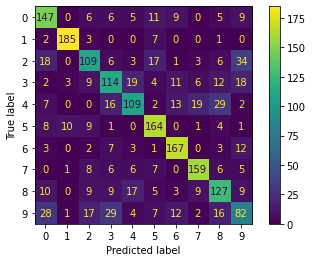

              precision    recall  f1-score   support

           0      0.653     0.742     0.695       198
           1      0.925     0.934     0.930       198
           2      0.634     0.553     0.591       197
           3      0.588     0.576     0.582       198
           4      0.657     0.553     0.601       197
           5      0.729     0.828     0.775       198
           6      0.773     0.843     0.807       198
           7      0.799     0.803     0.801       198
           8      0.608     0.641     0.624       198
           9      0.477     0.414     0.443       198

    accuracy                          0.689      1978
   macro avg      0.684     0.689     0.685      1978
weighted avg      0.684     0.689     0.685      1978

(0.6841741335919634, 0.6889427267599857, 0.6848159647911578, None)


In [18]:
results(lr_grid_search.best_estimator_, X_train_mif)
results(lr_grid_search.best_estimator_, X_train_mif, validation=True)

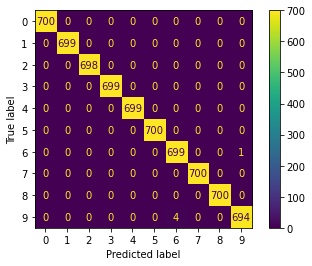

              precision    recall  f1-score   support

           0      1.000     1.000     1.000       700
           1      1.000     1.000     1.000       699
           2      1.000     1.000     1.000       698
           3      1.000     1.000     1.000       699
           4      1.000     1.000     1.000       699
           5      1.000     1.000     1.000       700
           6      0.994     0.999     0.996       700
           7      1.000     1.000     1.000       700
           8      1.000     1.000     1.000       700
           9      0.999     0.994     0.996       698

    accuracy                          0.999      6993
   macro avg      0.999     0.999     0.999      6993
weighted avg      0.999     0.999     0.999      6993

(0.9992871250652395, 0.9992840769545641, 0.9992846832676772, None)


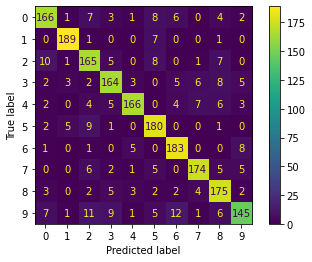

              precision    recall  f1-score   support

           0      0.860     0.838     0.849       198
           1      0.945     0.955     0.950       198
           2      0.793     0.838     0.815       197
           3      0.845     0.828     0.837       198
           4      0.922     0.843     0.881       197
           5      0.837     0.909     0.872       198
           6      0.863     0.924     0.893       198
           7      0.902     0.879     0.890       198
           8      0.822     0.884     0.852       198
           9      0.853     0.732     0.788       198

    accuracy                          0.863      1978
   macro avg      0.864     0.863     0.863      1978
weighted avg      0.864     0.863     0.863      1978

(0.864246457891924, 0.8629697995180228, 0.8625043907753233, None)


In [19]:
# Fitting the dataset with the 30 most important features to a random forest model
rfc = ske.RandomForestClassifier(random_state=12, n_jobs=-1)
rfc.fit(X_train_mif, y_train)
results(rfc, X_train_mif)
results(rfc, X_train_mif, validation=True)

In [20]:
# Tuning hyperparameters of the random forest model using grid_search.
n_estimators = [100, 1000]
max_features = ['sqrt', 'log2']
param_grid_rf = {'n_estimators': n_estimators, 'max_features': max_features}
cv = skms.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rf_grid_search = skms.GridSearchCV(estimator=rfc, param_grid=param_grid_rf, cv=cv, scoring='accuracy',error_score=0)
rf_grid_search.fit(X_train_mif, y_train)
print(rf_grid_search.best_params_)
print(rf_grid_search.best_estimator_)

{'max_features': 'sqrt', 'n_estimators': 1000}
RandomForestClassifier(max_features='sqrt', n_estimators=1000, n_jobs=-1,
                       random_state=12)


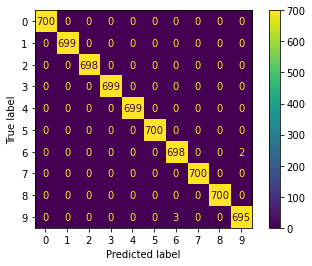

              precision    recall  f1-score   support

           0      1.000     1.000     1.000       700
           1      1.000     1.000     1.000       699
           2      1.000     1.000     1.000       698
           3      1.000     1.000     1.000       699
           4      1.000     1.000     1.000       699
           5      1.000     1.000     1.000       700
           6      0.996     0.997     0.996       700
           7      1.000     1.000     1.000       700
           8      1.000     1.000     1.000       700
           9      0.997     0.996     0.996       698

    accuracy                          0.999      6993
   macro avg      0.999     0.999     0.999      6993
weighted avg      0.999     0.999     0.999      6993

(0.9992850958970276, 0.9992844862873517, 0.9992846891237444, None)


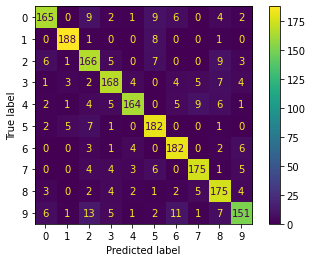

              precision    recall  f1-score   support

           0      0.892     0.833     0.862       198
           1      0.945     0.949     0.947       198
           2      0.787     0.843     0.814       197
           3      0.862     0.848     0.855       198
           4      0.916     0.832     0.872       197
           5      0.847     0.919     0.881       198
           6      0.867     0.919     0.892       198
           7      0.897     0.884     0.891       198
           8      0.822     0.884     0.852       198
           9      0.858     0.763     0.807       198

    accuracy                          0.868      1978
   macro avg      0.869     0.868     0.867      1978
weighted avg      0.869     0.868     0.867      1978

(0.8691249928254688, 0.8675126903553301, 0.8672915997514494, None)


In [21]:
results(rf_grid_search.best_estimator_, X_train_mif)
results(rf_grid_search.best_estimator_, X_train_mif, validation=True)

In [22]:
# Modifying the results function to return a confusion matrix for the test set
def test_results(model, X, validation=False):
    y_true = y_train
    if validation:
        X = X_test[X.columns]
        y_true = y_test
    y_prediction = model.predict(X)
    confusion_matrix = skm.confusion_matrix(y_true, y_prediction)
    cm_display = skm.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
    cm_display.plot()
    plt.show()
    print(skm.classification_report(y_true, y_prediction, digits=3))
    print(skm.precision_recall_fscore_support(y_true, y_prediction, average="macro"))
    print("=====================================================")


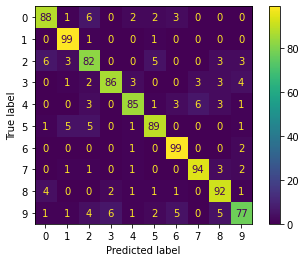

              precision    recall  f1-score   support

           0      0.880     0.863     0.871       102
           1      0.892     0.980     0.934       101
           2      0.788     0.804     0.796       102
           3      0.915     0.843     0.878       102
           4      0.895     0.833     0.863       102
           5      0.881     0.873     0.877       102
           6      0.892     0.971     0.930       102
           7      0.913     0.922     0.917       102
           8      0.844     0.902     0.872       102
           9      0.846     0.755     0.798       102

    accuracy                          0.874      1019
   macro avg      0.875     0.874     0.874      1019
weighted avg      0.875     0.874     0.873      1019

(0.8745875802808598, 0.874490390215492, 0.8735324382555568, None)


In [23]:
# Calculating the accuracy, precision, recall, f1-score, and sensitivity of the random forest model.
test_results(rf_grid_search.best_estimator_, X_train_mif, validation=True)

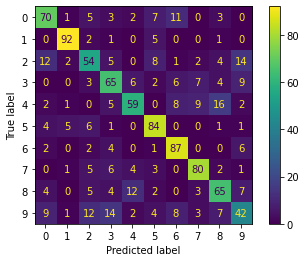

              precision    recall  f1-score   support

           0      0.680     0.686     0.683       102
           1      0.893     0.911     0.902       101
           2      0.574     0.529     0.551       102
           3      0.602     0.637     0.619       102
           4      0.694     0.578     0.631       102
           5      0.724     0.824     0.771       102
           6      0.719     0.853     0.780       102
           7      0.769     0.784     0.777       102
           8      0.631     0.637     0.634       102
           9      0.512     0.412     0.457       102

    accuracy                          0.685      1019
   macro avg      0.680     0.685     0.680      1019
weighted avg      0.680     0.685     0.680      1019

(0.679889316584197, 0.6852067559697146, 0.6804250053424541, None)


In [24]:
# Calculating the accuracy, precision, recall, f1-score, and sensitivity of the logistic regression model.
test_results(lr_grid_search.best_estimator_, X_train_mif, validation=True)